<a href="https://colab.research.google.com/github/thanhsonopera/ML1/blob/main/Lecture_1_Pandas_%2B_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Pandas

**DataFrame composes of many Series**
![box-plot](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)

## Read data to dataframe

### Read data from dict

In [8]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}
df = pd.DataFrame(data)
print('Type of df:', type(df))
df

Type of df: <class 'pandas.core.frame.DataFrame'>


,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


Mỗi (key, value) trong `data` tương ứng với một cột trong pandas dataframe.

**Index** của DataFrame trong trường hợp này sẽ tự động tự tạo từ 0-3, tuy nhiên chúng ta có thể khởi tạo **Index** cho DataFrame

Ví dụ khởi tạo Tên khách hàng cho **Index**

In [3]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


### Read data from csv

In [4]:
# Load dataset
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Truy vấn dữ liệu

In [ ]:
# lấy theo cột
df['sepal.length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [ ]:
df['sepal.length'][12]

4.8

**Exercises**

Truy vấn giá trị thứ 13 của cột `variety`

In [11]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df['variety'][13]


'Setosa'

In [12]:
# lấy theo dòng
x = df.iloc[0]
print('type(x)', type(x))
x

type(x) <class 'pandas.core.series.Series'>


sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [14]:
# truy vấn với điều kiện
df_setosa = df[df['variety']=='Setosa']
df_setosa.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Một số hàm thường dùng trong pandas

`info()` provides the essential details about your dataset, such as the number of rows and columns, the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Using `describe()` on an entire DataFrame we can get a summary of the distribution of continuous variables:

In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


By using the correlation method `.corr()` we can generate the relationship between each continuous variable:

In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [16]:
# Các giá trị phân biệt ở cột 'variety'
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

## Visualizing the data

<Axes: xlabel='petal.length', ylabel='petal.width'>

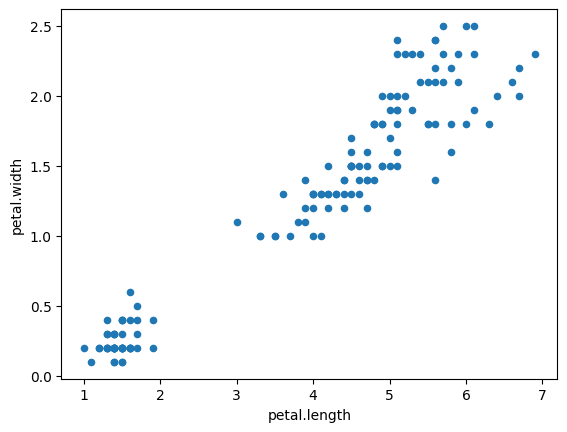

In [17]:
df.plot(x="petal.length", y="petal.width", kind="scatter")

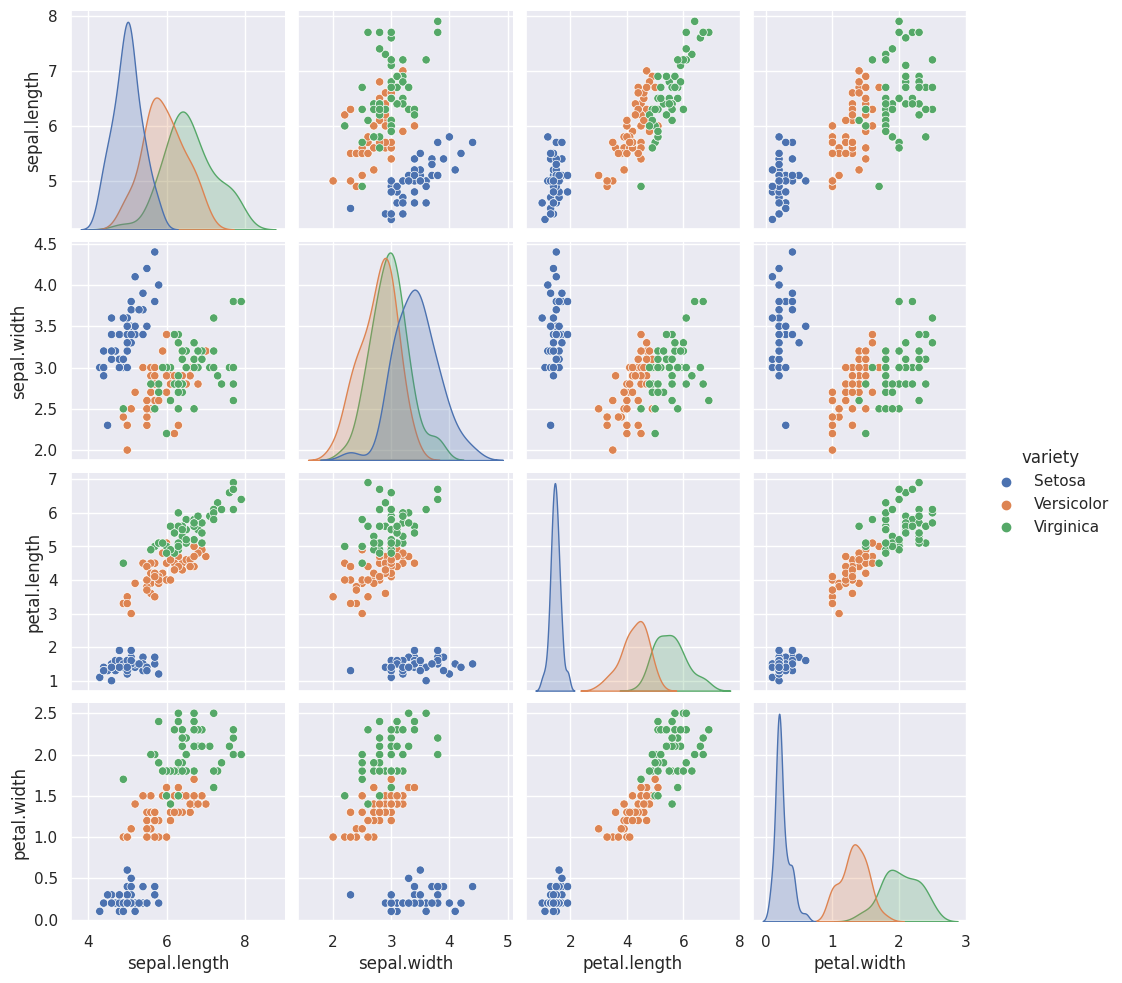

In [ ]:
# detail in https://seaborn.pydata.org/generated/seaborn.pairplot.html
import seaborn
seaborn.pairplot(df, hue="variety", diag_kind="kde")
plt.show()

# Sklearn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
# Lấy dữ liệu Feature, Label từ dataframe
array = df.values
X = array[:,0:4]
Y = array[:,4]
X.shape, Y.shape

((150, 4), (150,))

In [20]:
# Chia dữ liệu train-test
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((120, 4), (120,), (30, 4), (30,))

## K-nearest Neighbors

In [21]:
n_neighbor=3
model = KNeighborsClassifier(n_neighbor)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975


In [ ]:
print(classification_report(Y_train, y_pred ))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        43
  Versicolor       0.97      0.95      0.96        38
   Virginica       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



**Exercise 1.**

Sử dụng `model` đã huấn luyện để dự đoán nhãn cho tập test (`X_test`) và Tính *accuracy*

In [24]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Accuracy:", test_accuracy)

Accuracy: 0.9


**Exercise 2.**

1. thay đổi giá trị seed
2. Chia tập train-test theo mức 70-30
3. Tạo model `KNeighborsClassifier` với số `n_neighbor`=5
4. Huấn luyện mô hình và tính accuray cho tập test

In [36]:
test_size = 0.3
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
n_neighbor=4
model = KNeighborsClassifier(n_neighbor)
model.fit(X_train, Y_train)
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Accuracy:", test_accuracy)

Accuracy: 0.9555555555555556


## Support Vector Machine (SVM)

In [38]:
from sklearn.svm import SVC
# Make predictions on validation dataset
svn = SVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9777777777777777
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      0.94      0.97        16
   Virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Exercise3: Thử dự đoán dữ liệu tự tạo**

Tự tạo dữ liệu của 1 bản ghi chứa giá trị của 4 thuộc tính (`X_new`) và cho mô hình `svn` dự đoán `label` của bản ghi đó

In [44]:
# your code here
X_new = np.array([[1.7, 1.5, 1.3, 0.2]])

prediction = svn.predict(X_new)
print(prediction)

['Setosa']
